In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# One-dimensional homogeneous problems in a semiinfinite medium

page 54, "HEAT CONDUCTION", M. Özisik, 1980


![schema 2.5](images/schema_heatconduction_semiinfiniteregion.png)


La température extérieure est définie à zéro.

L'équation générale pour la température est :
![eq 2.54](images/eq_2_54.png)


![eq 2.54](images/tab_BC.png)


In [2]:
from scipy.integrate import quad

In [61]:
rhoCp = 1400e3 # densité*Capacité thermique, J/m3/K
k = 1.75  #  conductivité, W/m/K

alpha = k/rhoCp # diffusivité, s.m-2


conditionlimite = 'T_fixe' # 'T_fixe', 'adia', '3thd'

fun_F = lambda x: 100*np.exp( -x/0.3 )

In [62]:
I_right = lambda beta: quad(fun_F, 0, np.inf, weight='sin', wvar=beta )[0]

In [63]:
inv_N = 2.0 / np.pi
fun_exp_t = lambda beta, t: np.exp( -alpha * beta**2 * t  )

dI = lambda beta, t : fun_exp_t( beta, t ) *  inv_N * I_right( beta )

Temperature = lambda x, t: quad( dI, 0, np.inf, weight='sin', wvar=x, args=(t,)  )[0]

In [64]:
Temperature( 1.0, 1000.0 )

3.617292223921722

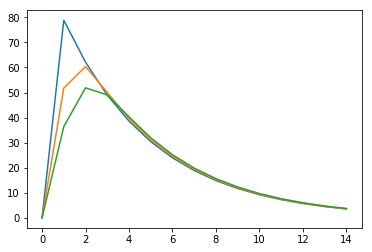

In [65]:
x_span = np.linspace( 0 , 1, 15 )
t_span = np.linspace( 0, 3600, 3 )

for t in t_span:
    Tx = []
    for x in x_span:
        Tx.append( Temperature(x, t) )
    plt.plot( Tx )

In [66]:
I_right( 10 )

9.0

# Avec la transformé de Laplace

page 275

# Avec Odeint

In [416]:
L = 1 # m
N = 20


In [417]:
X = np.linspace( 0, L, N )

dx = L/(N-1)
T = np.zeros_like( X )

In [418]:
Tzero = np.zeros_like( X )
#Tzero = 1+Tzero

In [419]:
def flux_in( T, t ):
    """ Flux entrant
        T: Température de surface, °C
        t: temps, sec
    """
    w = 2*np.pi/( 60*60*24 )
    F = 10*( 12*np.cos( w*t ) - T )
    return F

In [420]:
def Laplacien( U ):
    """ Calcul le laplacien du vecteur U
        avec des conditions aux limites adiabatiques 
    """
    d2Udx2 = np.zeros_like( U )
    
    U_i = U[1:-1]
    U_im1 = U[0:-2]
    U_ip1 = U[2:]

    d2Udx2[1:-1] = ( U_ip1 + U_im1 -2*U_i )/dx**2
    
    d2Udx2[0] = -(U[0]-U[1])/dx
    d2Udx2[-1] = (U[-2] - U[-1])/dx
    
    return d2Udx2

In [421]:
from scipy.integrate import odeint

In [422]:
def get_dTdt( T, t ):
    dTdt = np.zeros_like( T )
    
    dTdt = alpha*Laplacien( T )

    dTdt[0] += flux_in( T[0], t )

    return dTdt

In [423]:
t_span = np.linspace(0, 24*60*60*2, 16)

In [424]:
r = odeint(get_dTdt, Tzero, t_span)

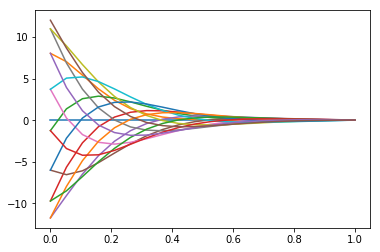

In [428]:
plt.plot( X, r.T );

In [426]:
r.shape

(16, 20)

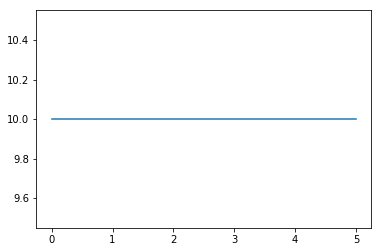

In [303]:
plt.plot( r.sum(axis=1) )

In [258]:
r

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.6679076 ,  0.65252024,  0.62160112,  0.57829674,  0.5270164 ,
         0.4729836 ,  0.42170326,  0.37839888,  0.34747976,  0.3320924 ],
       [ 0.5444872 ,  0.54040977,  0.53221711,  0.52074353,  0.50715748,
         0.49284252,  0.47925647,  0.46778289,  0.45959023,  0.4555128 ],
       [ 0.51178674,  0.51070644,  0.50853582,  0.50549593,  0.50189635,
         0.49810365,  0.49450407,  0.49146418,  0.48929356,  0.48821326],
       [ 0.50312286,  0.50283664,  0.50226154,  0.50145613,  0.50050243,
         0.49949757,  0.49854387,  0.49773846,  0.49716336,  0.49687714],
       [ 0.5008274 ,  0.50075156,  0.50059919,  0.5003858 ,  0.50013312,
         0.49986688,  0.4996142 ,  0.49940081,  0.49924844,  0.4991726 ]])